# Entrenamiento con datos de entrenamiento
<hr>

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [2]:
X = pd.read_csv("../Reduccion_descriptores/Prueba_hipotesis/SRC_h.csv")

In [3]:
X.shape

(2924, 70)

In [4]:
X.fillna(method='ffill', inplace=True)


C:\Users\Eliud\AppData\Local\Temp\ipykernel_17532\419284443.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [5]:
df = pd.read_csv("../Reduccion_descriptores/Datos_con_1000/SRC_1000.csv")

In [6]:
y = df["Inhibidor"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
pipe = Pipeline([
    ('NB', BernoulliNB())
])

In [9]:
param_grid = {
    'NB__alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'NB__binarize': [0.0, 0.5, 1.0, 1.5, 2.0],
    'NB__fit_prior': [True, False]
}

In [10]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [11]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=True; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=True; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=True; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=True; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=True; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=False; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=False; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=False; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=False; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.0, NB__fit_prior=False; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.5, NB__fit_prior=True; total time=   0.0s
[CV] END NB__alpha=0.1, NB__binarize=0.5, 

GridSearchCV(cv=5, estimator=Pipeline(steps=[('NB', BernoulliNB())]),
             param_grid={'NB__alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'NB__binarize': [0.0, 0.5, 1.0, 1.5, 2.0],
                         'NB__fit_prior': [True, False]},
             scoring='accuracy', verbose=2)

# Selección del mejor modelo
<hr>

In [12]:
best_model = grid_search.best_estimator_

# Resultados del modelo
<hr>

In [13]:
y_predicha = best_model.predict(X_test)

In [14]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.793
Recall 0.793
precision 0.805
f1 0.788


In [15]:
y_entrenamiento = best_model.predict(X_train)

In [16]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.77
Recall 0.77
precision 1.0
f1 0.761


# Confusion Matrix
<hr>

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [18]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

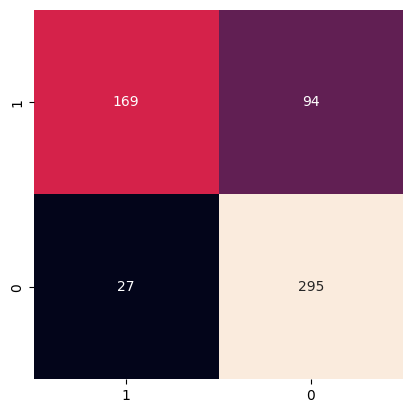

In [19]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["Inhibidor"].value_counts().index, yticklabels=df["Inhibidor"].value_counts().index)

# Guardar modelo
<hr>

In [20]:
import joblib

In [21]:
joblib.dump(pipe, '../GuardadoDeModelos/SRC_MD/modelo_NB.joblib')

['../GuardadoDeModelos/SRC_MD/modelo_NB.joblib']